In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow keras matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disable GPU

from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import scipy 

2024-10-14 10:14:32.518670: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-10-14 10:14:32.518685: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
#Cell 2: Data Augmentation and loading (modify file paths accordingly)
train_datagen = ImageDataGenerator(
    rescale=1./255,           
    shear_range=0.2,          
    zoom_range=0.2,           
    horizontal_flip=True,      
    rotation_range=20,        
    width_shift_range=0.2,    
    height_shift_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    'test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


Found 4009 images belonging to 2 classes.
Found 978 images belonging to 2 classes.


In [6]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disable GPU

from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import scipy  # Ensure SciPy is imported

# ... rest of your code ...

cnn = models.Sequential()

cnn.add(layers.Input(shape=(64, 64, 3)))
cnn.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(layers.BatchNormalization())
cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))

cnn.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(layers.BatchNormalization())
cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))

cnn.add(layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(layers.BatchNormalization())
cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))

cnn.add(layers.Flatten())
cnn.add(layers.Dense(units=128, activation='relu'))
cnn.add(layers.BatchNormalization())
cnn.add(layers.Dropout(0.5))

cnn.add(layers.Dense(units=64, activation='relu'))
cnn.add(layers.BatchNormalization())
cnn.add(layers.Dropout(0.5))

cnn.add(layers.Dense(units=1, activation='sigmoid'))

cnn.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Training
history = cnn.fit(
    x=training_set,
    validation_data=test_set,
    epochs=150,  # Increased epochs
    callbacks=[checkpoint, early_stopping]
)

2024-10-14 10:14:33.996677: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-10-14 10:14:33.996700: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-10-14 10:14:33.996716: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (VTH074): /proc/driver/nvidia/version does not exist
2024-10-14 10:14:33.996895: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/150
126/126 [==============================] - ETA: 0s - loss: 0.9213 - accuracy: 0.5642
Epoch 1: val_accuracy improved from -inf to 0.54908, saving model to best_model.keras
126/126 [==============================] - 153s 1s/step - loss: 0.9213 - accuracy: 0.5642 - val_loss: 0.7016 - val_accuracy: 0.5491
Epoch 2/150
126/126 [==============================] - ETA: 0s - loss: 0.8652 - accuracy: 0.5889
Epoch 2: val_accuracy improved from 0.54908 to 0.55726, saving model to best_model.keras
126/126 [==============================] - 136s 1s/step - loss: 0.8652 - accuracy: 0.5889 - val_loss: 0.7154 - val_accuracy: 0.5573
Epoch 3/150
126/126 [==============================] - ETA: 0s - loss: 0.8060 - accuracy: 0.6076
Epoch 3: val_accuracy improved from 0.55726 to 0.58078, saving model to best_model.keras
126/126 [==============================] - 105s 829ms/step - loss: 0.8060 - accuracy: 0.6076 - val_loss: 0.6968 - val_accuracy: 0.5808
Epoch 4/150
126/126 [=========================

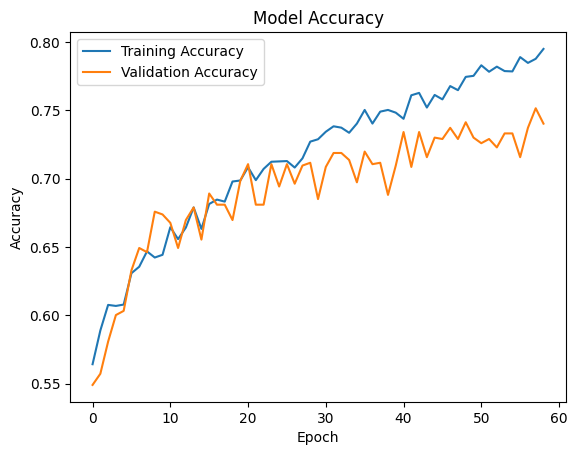

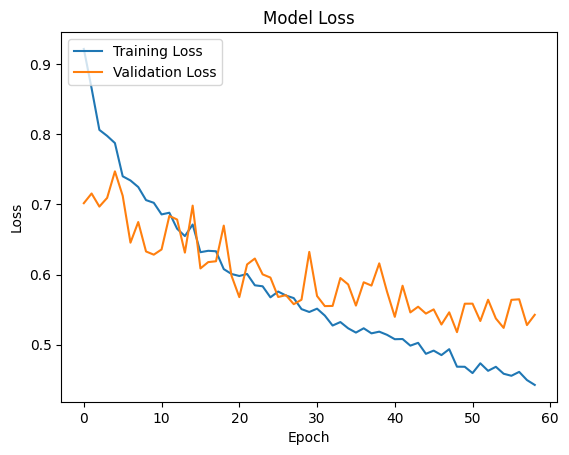

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()



In [8]:
# Assuming 'history' is the object returned from model.fit()
final_training_accuracy = history.history['accuracy'][-1]  # Last training accuracy
final_validation_accuracy = history.history['val_accuracy'][-1]  # Last validation accuracy

print(f"Final Training Accuracy: {final_training_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_validation_accuracy:.4f}")


Final Training Accuracy: 0.7950
Final Validation Accuracy: 0.7403


In [9]:
!pip install opencv-python
import cv2
print(cv2.__version__)


4.10.0


Processing image: test_set/men/00002262.jpg
Total number of people detected: 1
1/1 [==============================] - 0s 77ms/step
Raw prediction for face at (299, 39): 0.28157591819763184


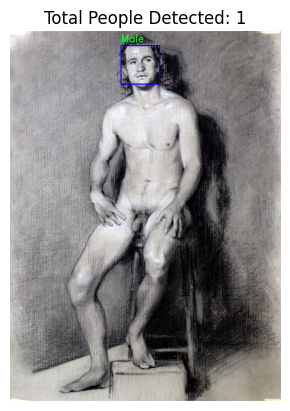

Person 1: Predicted Gender: Male


In [3]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2  # OpenCV for face detection
from tensorflow.keras import models
import os
# Assuming the model `cnn` is already trained and loaded here
cnn = models.load_model('best_model.keras')  # Load your trained model if not already defined

def detect_faces(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    return faces

def predict_gender_population(img_path):
    print(f'Processing image: {img_path}')
    if not os.path.isfile(img_path):
        print(f"Error: File not found - {img_path}")
        return

    img = image.load_img(img_path)
    original_img = cv2.imread(img_path)

    faces = detect_faces(original_img)
    total_count = len(faces)
    print(f'Total number of people detected: {total_count}')

    gender_results = []

    for (x, y, w, h) in faces:
        face = original_img[y:y+h, x:x+w]
        face_resized = cv2.resize(face, (64, 64))
        face_resized_array = face_resized / 255.0
        face_resized_array = np.expand_dims(face_resized_array, axis=0)

        prediction = cnn.predict(face_resized_array)

        # Print the raw prediction value for debugging
        print(f'Raw prediction for face at ({x}, {y}): {prediction[0][0]}')

        # Adjust the threshold if necessary
        if prediction[0][0] > 0.5:
            gender = 'Female'
        else:
            gender = 'Male'

        gender_results.append(gender)

        cv2.rectangle(original_img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(original_img, gender, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f'Total People Detected: {total_count}')
    plt.show()

    for i, gender in enumerate(gender_results):
        print(f'Person {i+1}: Predicted Gender: {gender}')

# Example usage
predict_gender_population('test_set/men/00002262.jpg')